<a href="https://colab.research.google.com/github/o-bollverk/msf/blob/main/msf_project1_mixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
#from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import warnings
import pandas as pd

# start: 10:34

/home/ludvigl/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Klassid:

Airbus A320neo

Boeing 747-8 Intercontinental

Aviat Pitts Special S2S

Cub Crafter X Cub

Daher TBM 930

Diamond DA40NG

Diamond DA62

EXTRA 330LT



https://www.windowscentral.com/list-microsoft-flight-simulator-planes


Cloning the repository

In [2]:
# Clone the entire repo.
#!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
#%cd cloned-repo
#!ls

In [3]:
#! git pull

In [5]:
nimede_vastavus = pd.DataFrame({"web_name": np.sort(listdir("all_data_color/")),
                                "game_name": np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")]))})

In [6]:
print(np.sort(listdir("all_data_color/")))
print(np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")])))

['airbus_color' 'aviat s2s_color' 'boeing 747_color' 'cessna 152_color' 'cessna 172_color' 'cessna 208_color'
 'cessna cj4_color' 'cub crafters xcub_color' 'daher tbm 930_color' 'diamond da40_color' 'diamond da62_color'
 'extra 330_color']
['airbus' 'aviat' 'boeing' 'cessna_152' 'cessna_172' 'cessna_208' 'cessna_cj' 'cubcraft' 'daher' 'diamond40ng'
 'diamondda62' 'extra']


In [7]:
! mkdir random_selection_train
! mkdir random_selection_test


# For balanced set

In [8]:
# creating temporary folder for selected files
from shutil import copyfile
import random
import shutil

selection_size_web = 250
selection_size_web_test = int(0.1*selection_size_web) #20%


def abifun(x):
    return x[:len(nimede_vastavus.game_name[i])] == nimede_vastavus.game_name[i]
 
for i in range(nimede_vastavus.shape[0]):
    web_files = listdir("all_data_color/" + nimede_vastavus.web_name[i])
    game_files_clear = listdir("msf_data/image_data_clear/")    
    game_files_clear_selected = np.array(game_files_clear)[[abifun(x) for x in game_files_clear]]
    game_files_rainy = listdir("msf_data/image_data_rainy/")
    game_files_rainy_selected = np.array(game_files_rainy)[[abifun(x) for x in game_files_rainy]]

    # making a random selection
    
    selected_web = random.sample(web_files, selection_size_web)
    selected_web2 = ["all_data_color/" + nimede_vastavus.web_name[i] + "/" + x for x in selected_web]
    selected_web2_test = selected_web2[0:selection_size_web_test]
    selected_web2_train = selected_web2[selection_size_web_test:]

    selected_clear = random.sample(set(game_files_clear_selected), int(selection_size_web/4))
    selected_clear2 = ["msf_data/image_data_clear/" + x for x in selected_clear]
    selected_clear2_test = selected_clear2[0:selection_size_web_test]
    selected_clear2_train = selected_clear2[selection_size_web_test:]

    selected_rainy = random.sample(set(game_files_rainy_selected), int(selection_size_web/4))
    selected_rainy2 = ["msf_data/image_data_rainy/" + x for x in selected_rainy]
    selected_rainy2_test = selected_rainy2[0:selection_size_web_test]
    selected_rainy2_train = selected_rainy2[selection_size_web_test:]

    complete_selection_train = np.concatenate([selected_web2_train, selected_clear2_train, selected_rainy2_train])
    complete_selection_test = np.concatenate([selected_web2_test, selected_clear2_test, selected_rainy2_test])

    os.mkdir("random_selection_train/" +  nimede_vastavus.game_name[i])
    for filename in complete_selection_train:
        shutil.copy(filename, "random_selection_train/" +  nimede_vastavus.game_name[i])

    os.mkdir("random_selection_test/" +  nimede_vastavus.game_name[i])
    for filename in complete_selection_test:
        shutil.copy(filename, "random_selection_test/" +  nimede_vastavus.game_name[i])



## For CNN model train set

In [65]:
# treeningandmete tegemine
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os, sys

d = {}
x=['aviat s2s_color', 'diamond da40_color', 'cessna 172_color', 'cessna cj4_color', 'boeing 747_color', 'diamond da62_color', 'airbus_color', 'cessna 208_color', 'extra 330_color', 'daher tbm 930_color', 'cub crafters xcub_color', 'cessna 152_color']
count = 0
for i in x:
    if i not in d:
        d[i] = count
        count += 1
actual = []
X_train = []
y_train = []
IMG_SIZE = (64, 64)
for i in listdir("all_data_color"):
    for j in listdir("all_data_color" + "/" + i):
        actual.append(i)
        a = cv2.imread("all_data_color/" + i +"/" + j)
        y_train.append(d[i])
        resized = cv2.resize(a, IMG_SIZE)
        X_train.append(resized)
       

X_train = np.array(X_train)
y_train = np.array(y_train)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)

Train data shape:  (26009, 64, 64, 3)
Train labels shape:  (26009,)


## For CNN model test set

In [ ]:
d = {}
x=['aviat s2s_color', 'diamond da40_color', 'cessna 172_color', 'cessna cj4_color', 'boeing 747_color', 'diamond da62_color', 'airbus_color', 'cessna 208_color', 'extra 330_color', 'daher tbm 930_color', 'cub crafters xcub_color', 'cessna 152_color']
count = 0
for i in x:
    if i not in d:
        d[i] = count
        count += 1
actual = []
X_test = []
y_test = []
IMG_SIZE = (64, 64)
for i in listdir("all_data_color"):
    for j in listdir("all_data_color" + "/" + i):
        actual.append(i)
        a = cv2.imread("all_data_color/" + i +"/" + j)
        y_test.append(d[i])
        resized = cv2.resize(a, IMG_SIZE)
        X_test.append(resized)
       

X_test = np.array(X_test)
y_test = np.array(y_test)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

## Using the train folder for training

In [9]:
import warnings

path = Path("random_selection_train")
warnings.filterwarnings('ignore')

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# annab warningut 

In [10]:
data.classes

['airbus',
 'aviat',
 'boeing',
 'cessna_152',
 'cessna_172',
 'cessna_208',
 'cessna_cj',
 'cubcraft',
 'daher',
 'diamond40ng',
 'diamondda62',
 'extra']

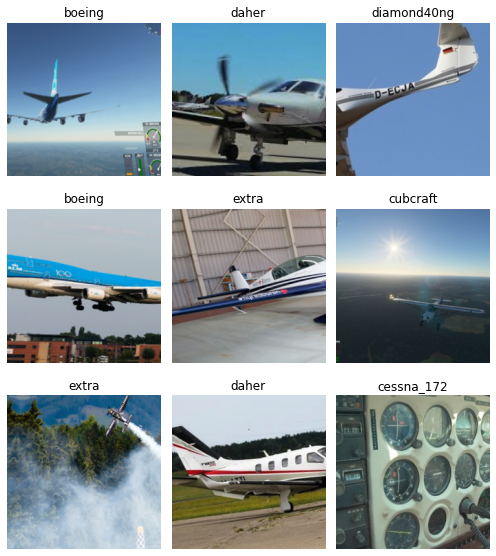

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airbus',
  'aviat',
  'boeing',
  'cessna_152',
  'cessna_172',
  'cessna_208',
  'cessna_cj',
  'cubcraft',
  'daher',
  'diamond40ng',
  'diamondda62',
  'extra'],
 12,
 2871,
 717)

## Train model

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [14]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,3.187217,1.828665,0.415621,04:08
1,2.254144,1.162733,0.608089,03:57
2,1.698625,0.922164,0.705718,04:03
3,1.337089,0.877394,0.739191,04:17
4,1.127760,0.757035,0.753138,04:11


Traceback (most recent call last):
  File "/home/ludvigl/anaconda3/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/home/ludvigl/anaconda3/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ludvigl/anaconda3/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/home/ludvigl/anaconda3/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

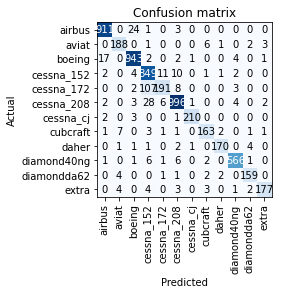

In [15]:
interp.plot_confusion_matrix()

In [16]:
warnings.filterwarnings('ignore')

tulemused = []
correct_labels = []
for i in listdir("random_selection_test"):
    for j in listdir("random_selection_test" + "/" + i):
        correct_labels.append(i)
        img = open_image("random_selection_test/" + i +"/" + j)
        pred_class,pred_idx,outputs = learn.predict(img)
        vastus = data.classes[int(pred_class)]
        tulemused = np.append(tulemused, vastus)

accuracy = sum(tulemused == correct_labels)/len(correct_labels)

print("Mixed accuracy: " + str(accuracy)) #Mixed images from game and internet.


Mixed accuracy: 0.9431460981276479


In [16]:
predictions = pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")
predictions[predictions.correct != predictions.prediction]

,correct,prediction
47,airbus,boeing
43,airbus,cubcraft
64,airbus,boeing
15,airbus,boeing
13,airbus,cubcraft
...,...,...
781,extra,diamondda62
759,extra,diamond40ng
790,extra,aviat
793,extra,cessna_152
